In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/NLP/Shared Task

/content/drive/MyDrive/NLP/Shared Task


In [3]:
ls

 arguments-training.tsv
'Copy of NLI.ipynb'
'Copy of Task4 (Identification of Human Values behind Arguments).ipynb'
 glove.twitter.27B.200d.txt
 labels-training.tsv
 level1-labels-training.tsv
 model.png
 README.md
'Task4 (Identification of Human Values behind Arguments).ipynb'
 Untitled0.ipynb
 Untitled1.ipynb
 value-categories.json
 vocab.txt


In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [5]:
args_train = pd.read_csv("arguments-training.tsv", delimiter='\t')
args_train.head()

,Argument ID,Conclusion,Stance,Premise
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...
1,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
2,A01003,We should abandon marriage,against,marriage is the ultimate commitment to someone...
3,A01004,We should ban naturopathy,against,it provides a useful income for some people
4,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...


In [6]:
labels_train = pd.read_csv("labels-training.tsv", delimiter='\t')
labels_train.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01001,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01002,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,A01003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A01004,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,A01005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
args_train.shape, labels_train.shape

((5220, 4), (5220, 21))

In [8]:
df = args_train.merge(labels_train, how='inner', on='Argument ID')
df.head()

,Argument ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,A01003,We should abandon marriage,against,marriage is the ultimate commitment to someone...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A01004,We should ban naturopathy,against,it provides a useful income for some people,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
X = df[['Conclusion', 'Stance', 'Premise']]
Y = df.drop(['Argument ID', 'Conclusion', 'Stance', 'Premise'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [11]:
X_train.shape, y_train.shape

((4437, 3), (4437, 20))

In [12]:
X_test.shape, y_test.shape

((783, 3), (783, 20))

In [13]:
def unique_words_seperator(column):
    words_list = list(column.str.split(' ', expand=True).stack().unique())
  # In the following line, I am removing puncuation mark from the end or beginning of the words.
    rec_words_list = [w.strip('.,;()[]') for w in words_list]
    return rec_words_list

In [14]:
def common_words_finder(vocab1, vocab2):
    common_vocab = [word for word in vocab1 if word in vocab2] 
    return common_vocab

In [15]:
train_s1 = unique_words_seperator(X_train['Premise'])
train_s2 = unique_words_seperator(X_train['Conclusion'])
train_s3 = unique_words_seperator(X_train['Stance'])

train_vocab = train_s1 + train_s2 + train_s3
#train_vocab = train_s1 + train_s2
train_vocab = list(set(train_vocab))    # to only keep unique words

test_s1 = unique_words_seperator(X_test['Premise'])
test_s2 = unique_words_seperator(X_test['Conclusion'])
test_s3 = unique_words_seperator(X_test['Stance'])

#test_vocab = test_s1 + test_s2
test_vocab = test_s1 + test_s2 + test_s3
test_vocab = list(set(test_vocab))    # to only keep unique words

print("Number of unique words in dev set: ", str(len(train_vocab)))
print("Number of unique words in test set: ", str(len(test_vocab)))
print("Number of unique common words in dev and test set: ", str(len(common_words_finder(train_vocab, test_vocab))))
print("percentage of common words in test set: ", str(len(common_words_finder(train_vocab, test_vocab)) / len(test_vocab)))

Number of unique words in dev set:  7106
Number of unique words in test set:  2833
Number of unique common words in dev and test set:  2308
percentage of common words in test set:  0.8146840804800565


In [16]:
!pip install tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 4.9 MB/s 
     |████████████████████████████████| 238 kB 89.1 MB/s 
     |████████████████████████████████| 662 kB 77.5 MB/s 
     |████████████████████████████████| 352 kB 94.7 MB/s 
     |████████████████████████████████| 118 kB 114.3 MB/s 
     |████████████████████████████████| 2.3 MB 74.9 MB/s 
     |████████████████████████████████| 5.8 MB 75.9 MB/s 
     |████████████████████████████████| 38.2 MB 1.3 MB/s 
     |████████████████████████████████| 1.1 MB 57.9 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 1.3 MB 62.6 MB/s 
     |████████████████████████████████| 439 kB 82.9 MB/s 
     |████████████████████████████████| 6.0 MB 73.0 MB/s 
     |████████████████████████████████| 1.7 MB 67.4 MB/s 
  Created wheel for seqeval: file

In [17]:
!pip install bert-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 


In [18]:
!pip install bert-for-tf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 156 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=c1579a836f04fb7886247bb9858380ee8d695f4e3fa9f6166151bd25c2bac9e6
  Stored in directory: /root/.cache/pip/wheels/ab/a4/72/df07592cea3ae06b5e846f5e52262f8b16748e829ca354b7df
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=1ae50f070ed1fe8d069c1d057bf0acb49eb7aade278a74659c96de058516c2f1
  Stored in directory: /root/.cache/pip/wheels/c7/f3/85/b8cf1d8bfe55dc2ece0f1fcd4e91d6f8fc7b59ff3fd75329e1
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=64fae2d22c07aa427dd716b0bdffedf04920c13e5d347fa176c5c634894e3583
  Stored in directory: /root/.cache/pip/wheels/ac/26/e9/df16869ccbd4abf517f1ff3be9a2c7ee5c5980fc87eea04fb1
Successfully built bert-for-tf2 params-flow p

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
from official.nlp.configs import bert
from bert import bert_tokenization
import os

In [21]:
X_train.head(2)

,Conclusion,Stance,Premise
70,We should legalize cannabis,against,"cannabis is highly addictive, studies show up ..."
1485,We should end affirmative action,against,groups of society that are under-served due to...


In [26]:
train_sentences = []
for row in X_train.values:
    train_sentences.append("<CLS>" + row[0] + "<SEP>" + row[1] + "<SEP>" + row[2])
train_sentences = np.array(train_sentences)

In [67]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

In [68]:
input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='input')
preprocessed = bert_preprocess(input)
premise_outputs = bert_encoder(preprocessed)['pooled_output']
dense0 = tf.keras.layers.Dense(512, activation='relu', name='dense0')(premise_outputs)
dropout1 = tf.keras.layers.Dropout(0.3, name="dropout1")(dense0)
dense1 = tf.keras.layers.Dense(256, activation='relu', name='dense1')(dropout1)


outs = []
for _ in range(20):
    dense2 = tf.keras.layers.Dense(64, activation='relu', name=f"dense{2+_}")(dense1)
    dropout2 = tf.keras.layers.Dropout(0.2, name=f"finaldropout{2+_}")(dense2)
    out = tf.keras.layers.Dense(1, activation='sigmoid', name=f"finaloutput{_}")(dropout2)
    outs.append(out)

In [69]:
model = tf.keras.Model(inputs=input, outputs = outs)

In [70]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['input[0][0]']                  
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

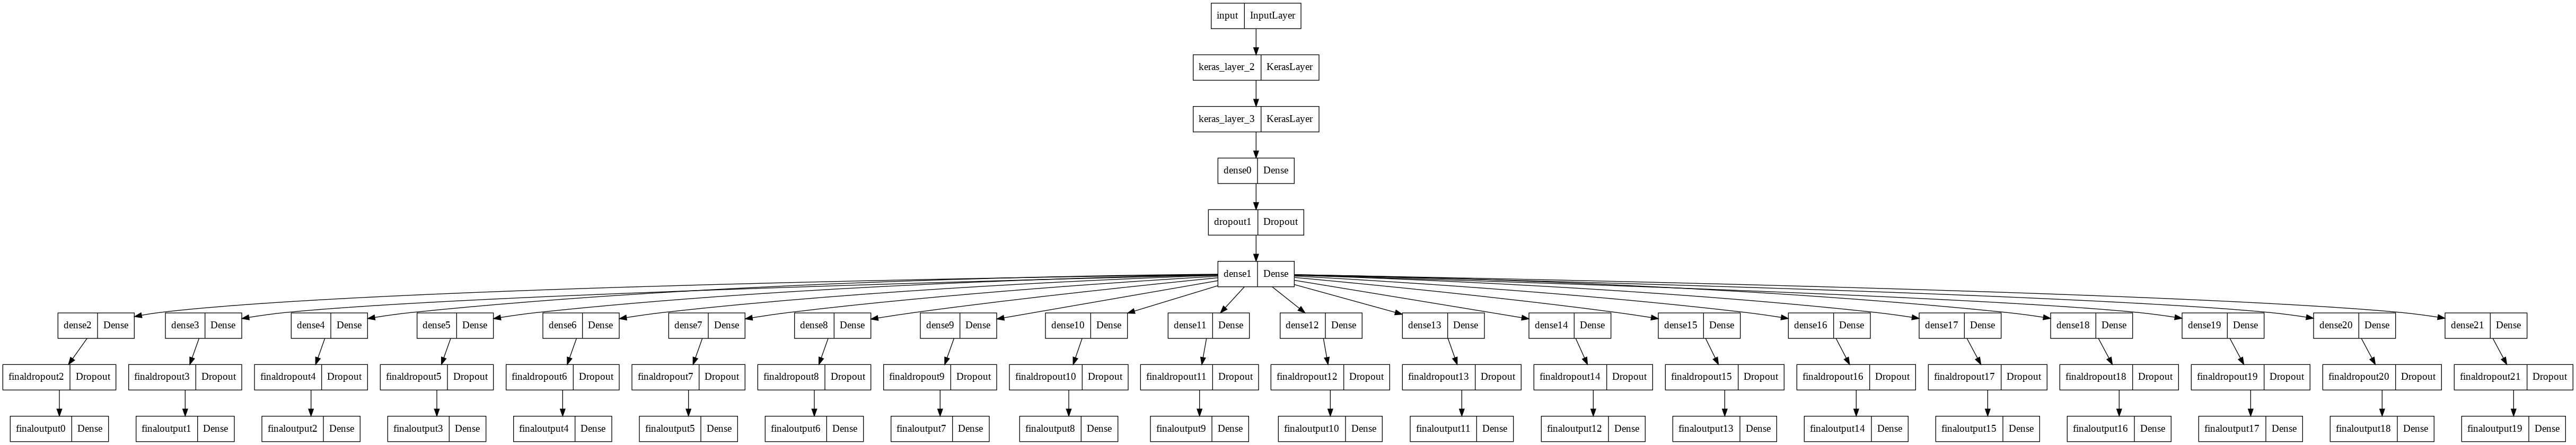

In [71]:
from keras.utils import plot_model
plot_model(model)

In [72]:
y0 = y_train.iloc[:, 0].values
y1 = y_train.iloc[:, 1].values
y2 = y_train.iloc[:, 2].values
y3 = y_train.iloc[:, 3].values
y4 = y_train.iloc[:, 4].values
y5 = y_train.iloc[:, 5].values
y6 = y_train.iloc[:, 6].values
y7 = y_train.iloc[:, 7].values
y8 = y_train.iloc[:, 8].values
y9 = y_train.iloc[:, 9].values
y10 = y_train.iloc[:, 10].values
y11 = y_train.iloc[:, 11].values
y12 = y_train.iloc[:, 12].values
y13 = y_train.iloc[:, 13].values
y14 = y_train.iloc[:, 14].values
y15 = y_train.iloc[:, 15].values
y16 = y_train.iloc[:, 16].values
y17 = y_train.iloc[:, 17].values
y18 = y_train.iloc[:, 18].values
y19 = y_train.iloc[:, 19].values

In [73]:
import keras
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEPOCH {epoch}: ")
        avg_loss = 0
        avg_acc = 0
        avg_val_acc = 0
        avg_val_loss = 0
        for _ in range(20):
            avg_loss += logs[f'finaloutput{_}_loss']
            avg_acc += logs[f'finaloutput{_}_accuracy']
            avg_val_loss += logs[f'val_finaloutput{_}_loss']
            avg_val_acc += logs[f'val_finaloutput{_}_accuracy']
        print(f"AVERAGE LOSS: {avg_loss/20} \t AVERAGE VAL LOSS: {avg_val_loss/20} \t AVERAGE ACCURACY: {avg_acc/20} \t AVERAGE VAL ACCURACY: {avg_val_acc/20}")

In [74]:
from keras.metrics import TopKCategoricalAccuracy, Precision, Recall
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
!nvidia-smi

Tue Dec 13 18:24:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    31W /  70W |  14238MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [76]:
y1.shape

(4437,)

In [77]:
train_sentences.shape

(4437,)

In [78]:
hist = model.fit(train_sentences, [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19], epochs=50, batch_size=32, validation_split=0.15, shuffle=True, callbacks=[CustomCallback()])

Epoch 1/50
118/118 [==============================] - ETA: 0s - loss: 8.8291 - finaloutput0_loss: 0.4851 - finaloutput1_loss: 0.5906 - finaloutput2_loss: 0.2543 - finaloutput3_loss: 0.2071 - finaloutput4_loss: 0.6075 - finaloutput5_loss: 0.3085 - finaloutput6_loss: 0.3703 - finaloutput7_loss: 0.2859 - finaloutput8_loss: 0.6793 - finaloutput9_loss: 0.6379 - finaloutput10_loss: 0.3885 - finaloutput11_loss: 0.5656 - finaloutput12_loss: 0.1963 - finaloutput13_loss: 0.3080 - finaloutput14_loss: 0.6260 - finaloutput15_loss: 0.4375 - finaloutput16_loss: 0.6808 - finaloutput17_loss: 0.2783 - finaloutput18_loss: 0.4286 - finaloutput19_loss: 0.4932 - finaloutput0_accuracy: 0.8186 - finaloutput1_accuracy: 0.7417 - finaloutput2_accuracy: 0.9337 - finaloutput3_accuracy: 0.9454 - finaloutput4_accuracy: 0.7216 - finaloutput5_accuracy: 0.9122 - finaloutput6_accuracy: 0.8823 - finaloutput7_accuracy: 0.9242 - finaloutput8_accuracy: 0.6094 - finaloutput9_accuracy: 0.6818 - finaloutput10_accuracy: 0.8783 

In [79]:
model.save("Classifier.h5")

In [82]:
df = pd.DataFrame(model.history.history)
df.head()

,loss,finaloutput0_loss,finaloutput1_loss,finaloutput2_loss,finaloutput3_loss,finaloutput4_loss,finaloutput5_loss,finaloutput6_loss,finaloutput7_loss,finaloutput8_loss,finaloutput9_loss,finaloutput10_loss,finaloutput11_loss,finaloutput12_loss,finaloutput13_loss,finaloutput14_loss,finaloutput15_loss,finaloutput16_loss,finaloutput17_loss,finaloutput18_loss,finaloutput19_loss,finaloutput0_accuracy,finaloutput1_accuracy,finaloutput2_accuracy,finaloutput3_accuracy,finaloutput4_accuracy,finaloutput5_accuracy,finaloutput6_accuracy,finaloutput7_accuracy,finaloutput8_accuracy,finaloutput9_accuracy,finaloutput10_accuracy,finaloutput11_accuracy,finaloutput12_accuracy,finaloutput13_accuracy,finaloutput14_accuracy,finaloutput15_accuracy,finaloutput16_accuracy,finaloutput17_accuracy,finaloutput18_accuracy,finaloutput19_accuracy,val_loss,val_finaloutput0_loss,val_finaloutput1_loss,val_finaloutput2_loss,val_finaloutput3_loss,val_finaloutput4_loss,val_finaloutput5_loss,val_finaloutput6_loss,val_finaloutput7_loss,val_finaloutput8_loss,val_finaloutput9_loss,val_finaloutput10_loss,val_finaloutput11_loss,val_finaloutput12_loss,val_finaloutput13_loss,val_finaloutput14_loss,val_finaloutput15_loss,val_finaloutput16_loss,val_finaloutput17_loss,val_finaloutput18_loss,val_finaloutput19_loss,val_finaloutput0_accuracy,val_finaloutput1_accuracy,val_finaloutput2_accuracy,val_finaloutput3_accuracy,val_finaloutput4_accuracy,val_finaloutput5_accuracy,val_finaloutput6_accuracy,val_finaloutput7_accuracy,val_finaloutput8_accuracy,val_finaloutput9_accuracy,val_finaloutput10_accuracy,val_finaloutput11_accuracy,val_finaloutput12_accuracy,val_finaloutput13_accuracy,val_finaloutput14_accuracy,val_finaloutput15_accuracy,val_finaloutput16_accuracy,val_finaloutput17_accuracy,val_finaloutput18_accuracy,val_finaloutput19_accuracy
0,8.829089,0.485098,0.590580,0.254322,0.207071,0.607485,0.308535,0.370261,0.285890,0.679260,0.637902,0.388458,0.565559,0.196313,0.308019,0.625991,0.437470,0.680795,0.278269,0.428579,0.493229,0.818616,0.741713,0.933705,0.945373,0.721559,0.912225,0.882259,0.924158,0.609387,0.681782,0.878282,0.753646,0.947759,0.912490,0.699019,0.842217,0.596924,0.928136,0.853885,0.809334,8.488568,0.461079,0.571236,0.243362,0.155020,0.590635,0.328813,0.341464,0.223815,0.682133,0.669071,0.370325,0.561757,0.172819,0.271398,0.622373,0.424252,0.674117,0.229254,0.385212,0.510434,0.836336,0.741742,0.933934,0.965465,0.726727,0.900901,0.897898,0.942943,0.602102,0.656156,0.897898,0.752252,0.959459,0.927928,0.690691,0.872372,0.611111,0.944444,0.870871,0.815315
1,8.626240,0.480937,0.579877,0.248130,0.185138,0.589164,0.304090,0.361290,0.273364,0.669820,0.628792,0.379121,0.559146,0.182403,0.304298,0.613189,0.435740,0.673288,0.265656,0.411126,0.481670,0.825511,0.746221,0.937152,0.957306,0.735349,0.914877,0.890215,0.926810,0.613630,0.692124,0.882259,0.762928,0.958366,0.916998,0.709891,0.853089,0.613100,0.928931,0.864227,0.822328,8.660017,0.460275,0.580862,0.258968,0.179134,0.594060,0.348177,0.380646,0.251955,0.672178,0.651501,0.347284,0.560804,0.222486,0.292890,0.618617,0.418300,0.673016,0.237313,0.415904,0.495646,0.836336,0.741742,0.933934,0.965465,0.726727,0.900901,0.897898,0.942943,0.602102,0.656156,0.897898,0.752252,0.959459,0.927928,0.690691,0.872372,0.611111,0.944444,0.870871,0.815315
2,8.555532,0.472299,0.575809,0.245782,0.186490,0.587598,0.302207,0.359124,0.269952,0.666658,0.626610,0.374462,0.554738,0.179373,0.294647,0.607973,0.427747,0.670939,0.266208,0.409182,0.477731,0.825511,0.746486,0.937152,0.957306,0.735614,0.914877,0.890215,0.926810,0.628215,0.691594,0.882259,0.762928,0.958366,0.916998,0.710952,0.853089,0.618404,0.928931,0.864227,0.822593,8.498402,0.460380,0.576528,0.246099,0.173295,0.592206,0.340718,0.361333,0.220230,0.672152,0.644056,0.344326,0.565694,0.187035,0.276704,0.622413,0.413690,0.669435,0.244813,0.404021,0.483276,0.836336,0.741742,0.933934,0.965465,0.726727,0.900901,0.897898,0.942943,0.602102,0.656156,0.897898,0.752252,0.959459,0.927928,0.690691,0.872372,0

In [83]:
df.to_csv("Classifier_history.csv", index=False)

In [84]:
test_sentences = []
for row in X_test.values:
    test_sentences.append("<CLS>" + row[0] + "<SEP>" + row[1] + "<SEP>" + row[2])
test_sentences = np.array(test_sentences)

In [85]:
y0 = y_test.iloc[:, 0].values
y1 = y_test.iloc[:, 1].values
y2 = y_test.iloc[:, 2].values
y3 = y_test.iloc[:, 3].values
y4 = y_test.iloc[:, 4].values
y5 = y_test.iloc[:, 5].values
y6 = y_test.iloc[:, 6].values
y7 = y_test.iloc[:, 7].values
y8 = y_test.iloc[:, 8].values
y9 = y_test.iloc[:, 9].values
y10 = y_test.iloc[:, 10].values
y11 = y_test.iloc[:, 11].values
y12 = y_test.iloc[:, 12].values
y13 = y_test.iloc[:, 13].values
y14 = y_test.iloc[:, 14].values
y15 = y_test.iloc[:, 15].values
y16 = y_test.iloc[:, 16].values
y17 = y_test.iloc[:, 17].values
y18 = y_test.iloc[:, 18].values
y19 = y_test.iloc[:, 19].values

In [94]:
test_preds = model.predict(test_sentences, batch_size=16)

49/49 [==============================] - 7s 147ms/step


In [111]:
preds = {}
actual = {}
y_test_temp = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19]
for i in range(20):
    preds[f"y{i}"] = np.squeeze(np.where(test_preds[i] < 0.5, 0, 1))
    actual[f"y{i}"] = y_test_temp[i]

In [112]:
len(test_preds), len(y_test_temp)

(20, 20)

In [113]:
preds['y0'].shape

(783,)

In [122]:
yhat = pd.DataFrame(preds)

In [123]:
ytrue = pd.DataFrame(actual)

In [119]:
from sklearn.metrics import f1_score

In [125]:
f1 = 0
for i in range(20):
    f1 += f1_score(yhat[f'y{i}'], ytrue[f'y{i}'], average="macro")
f1 = f1 / 20
f1

0.45141662804358945

In [126]:
train_preds = model.predict(train_sentences, batch_size=16)

278/278 [==============================] - 40s 145ms/step


In [127]:
y0 = y_train.iloc[:, 0].values
y1 = y_train.iloc[:, 1].values
y2 = y_train.iloc[:, 2].values
y3 = y_train.iloc[:, 3].values
y4 = y_train.iloc[:, 4].values
y5 = y_train.iloc[:, 5].values
y6 = y_train.iloc[:, 6].values
y7 = y_train.iloc[:, 7].values
y8 = y_train.iloc[:, 8].values
y9 = y_train.iloc[:, 9].values
y10 = y_train.iloc[:, 10].values
y11 = y_train.iloc[:, 11].values
y12 = y_train.iloc[:, 12].values
y13 = y_train.iloc[:, 13].values
y14 = y_train.iloc[:, 14].values
y15 = y_train.iloc[:, 15].values
y16 = y_train.iloc[:, 16].values
y17 = y_train.iloc[:, 17].values
y18 = y_train.iloc[:, 18].values
y19 = y_train.iloc[:, 19].values

In [128]:
preds = {}
actual = {}
y_train_temp = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19]
for i in range(20):
    preds[f"y{i}"] = np.squeeze(np.where(train_preds[i] < 0.5, 0, 1))
    actual[f"y{i}"] = y_train_temp[i]

In [129]:
yhat = pd.DataFrame(preds)
ytrue = pd.DataFrame(actual)

In [130]:
f1_train = 0
for i in range(20):
    f1_train += f1_score(yhat[f'y{i}'], ytrue[f'y{i}'], average="macro")
f1_train = f1_train / 20
f1_train

0.45115207533835966

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

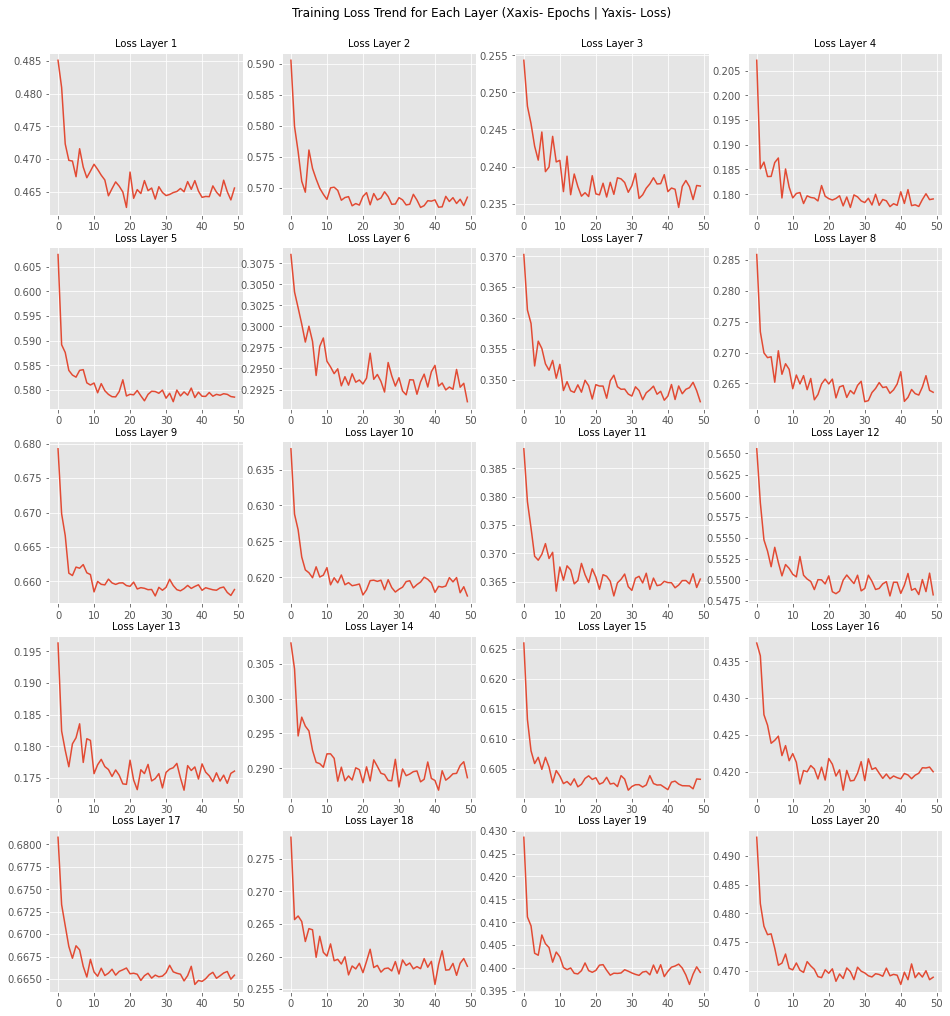

In [151]:

fig, ax = plt.subplots(5, 4, figsize=(16, 16))
count = 0
for i in range(5):
    for j in range(4):
        ax[i][j].plot(list(range(50)), df[f'finaloutput{count}_loss'])
        ax[i][j].set_title(f"Loss Layer {count+1}", fontsize=10)
        count += 1
plt.suptitle("Training Loss Trend for Each Layer (Xaxis- Epochs | Yaxis- Loss)")
plt.subplots_adjust(top=0.94)
plt.show()

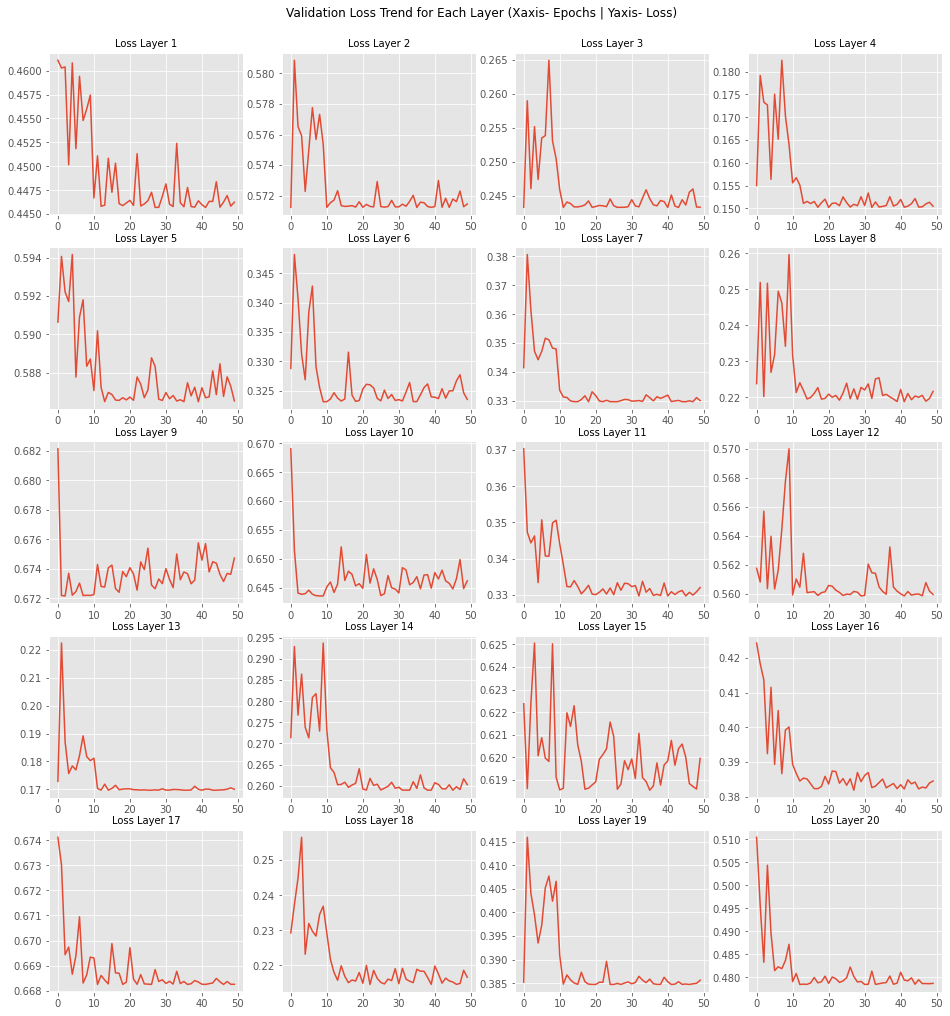

In [152]:

fig, ax = plt.subplots(5, 4, figsize=(16, 16))
count = 0
for i in range(5):
    for j in range(4):
        ax[i][j].plot(list(range(50)), df[f'val_finaloutput{count}_loss'])
        ax[i][j].set_title(f"Loss Layer {count+1}", fontsize=10)
        count += 1
plt.suptitle("Validation Loss Trend for Each Layer (Xaxis- Epochs | Yaxis- Loss)")
plt.subplots_adjust(top=0.94)
plt.show()